<a href="https://colab.research.google.com/github/github-ashwin/DeepLearning-Lab/blob/main/SimpleRNN_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
import matplotlib.pyplot as plt

In [36]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [37]:
x_train = x_train/255.0
x_test = x_test/255.0

In [38]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [39]:
x_train.shape

(60000, 28, 28)

In [40]:
y_train.shape

(60000, 10)

In [41]:
model = Sequential()

model.add(SimpleRNN(128,input_shape=(28,28)))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 128)            │        20,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,002 (113.29 KB)

 Trainable params: 29,002 (113.29 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(x_train,y_train,batch_size=32,verbose=1,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8131 - loss: 0.5904 - val_accuracy: 0.9146 - val_loss: 0.2681
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.9403 - loss: 0.2033 - val_accuracy: 0.9636 - val_loss: 0.1334
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9505 - loss: 0.1688 - val_accuracy: 0.9417 - val_loss: 0.1993
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9550 - loss: 0.1571 - val_accuracy: 0.9638 - val_loss: 0.1311
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9600 - loss: 0.1412 - val_accuracy: 0.9637 - val_loss: 0.1333
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9611 - loss: 0.1352 - val_accuracy: 0.9518 - val_loss: 0.1686
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9599 - loss: 0.1375 - val_accuracy: 0.9503 - val_loss: 0.1818
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9630 -

In [45]:
test_acc,test_loss = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9580 - loss: 0.1451


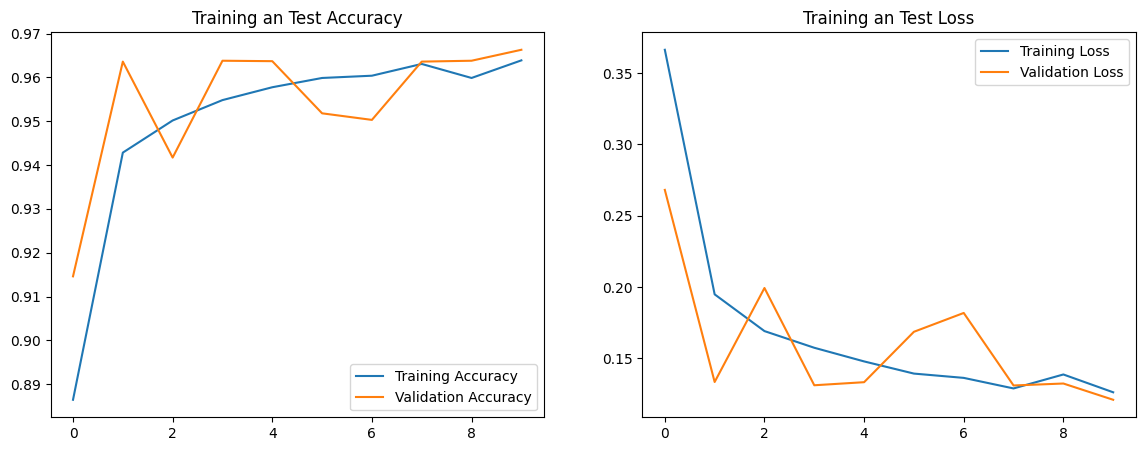

In [46]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title("Training an Test Accuracy")
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.title("Training an Test Loss")
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()